In [1]:
!pip install pyforest
import pyforest

  Using cached pyforest-1.1.0-py2.py3-none-any.whl


In [2]:
td=pd.read_csv(r'C:\Users\Lenovo\Documents\titanic data.csv')
td

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
td.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(td.info())
print('*'*45)
print(td.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
*********************************************
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket   

In [6]:
print(td.isna().sum())
print('*'*50)
td=(td.drop(['Name','Ticket','Cabin'],axis=1))
td

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
**************************************************


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
print(td['Age'].median())
print('*********************************************')
td['Age']=td['Age'].fillna(value=28)
td

28.0
*********************************************


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,28.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [8]:
td.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [9]:
print(td.groupby('Embarked')['Embarked'].count())
print(td['Fare'].median())

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64
14.4542


In [10]:
td['Embarked']=td['Embarked'].fillna(value='S')
td.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [11]:
#import label encoder
from sklearn import preprocessing

#label_encoder object knows hww to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encode labels in column 'transmission'
td['Sex']=label_encoder.fit_transform(td['Sex'])

print(td['Sex'].value_counts())#converting 

td['Embarked']=label_encoder.fit_transform(td['Embarked'])

print(td['Embarked'].value_counts())#converting 

1    577
0    314
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64


In [12]:
td

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,28.0,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


<IPython.core.display.Javascript object>

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

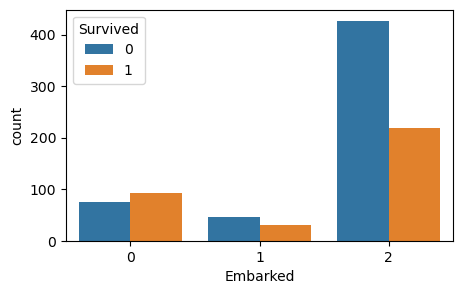

In [13]:
sns.countplot(td['Embarked'],hue=(td['Survived']))
plt.gcf().set_size_inches(5,3) #get current figure
plt.show()

In [14]:
td.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.034212,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.108262
Age,0.034212,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.018754
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.018754,0.068230,0.039798,-0.224719,1.000000


<IPython.core.display.Javascript object>

<AxesSubplot:>

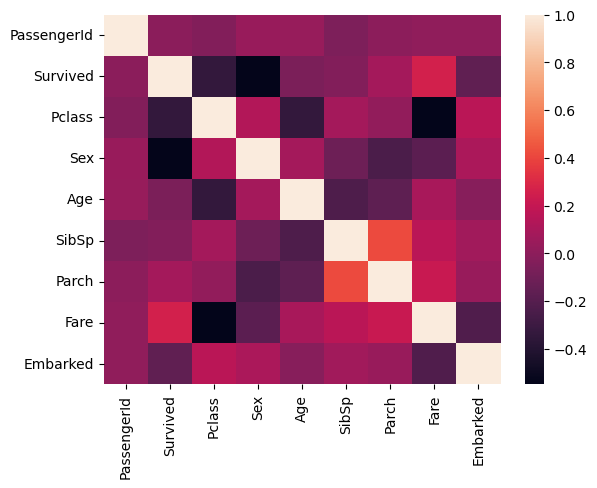

In [15]:
sns.heatmap(td.corr())

In [16]:
td['Family']=td['SibSp']+td['Parch']
td=td.drop(['SibSp','Parch'],axis=1)
td=td.drop(['PassengerId','Embarked'],axis=1)
td

,Survived,Pclass,Sex,Age,Fare,Family
0,0,3,1,22.0,7.2500,1
1,1,1,0,38.0,71.2833,1
2,1,3,0,26.0,7.9250,0
3,1,1,0,35.0,53.1000,1
4,0,3,1,35.0,8.0500,0
...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0
887,1,1,0,19.0,30.0000,0
888,0,3,0,28.0,23.4500,3
889,1,1,1,26.0,30.0000,0


In [17]:
td.tail(20)

,Survived,Pclass,Sex,Age,Fare,Family
871,1,1,0,47.0,52.5542,2
872,0,1,1,33.0,5.0000,0
873,0,3,1,47.0,9.0000,0
874,1,2,0,28.0,24.0000,1
875,1,3,0,15.0,7.2250,0
876,0,3,1,20.0,9.8458,0
877,0,3,1,19.0,7.8958,0
878,0,3,1,28.0,7.8958,0
879,1,1,0,56.0,83.1583,1
880,1,2,0,25.0,26.0000,1


In [18]:
a=td.drop('Survived',axis=1).values
b=td['Survived'].values

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.3,random_state=100)

In [21]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
accuracy_score(y_test,lr.predict(x_test))

0.7910447761194029